In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("HRDataset_v14.csv")  
df.head()


,Employee_Name,EmpID,MarriedID,MaritalStatusID,GenderID,EmpStatusID,DeptID,PerfScoreID,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerName,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences
0,"Adinolfi, Wilson K",10026,0,0,1,1,5,4,0,62506,0,19,Production Technician I,MA,1960,07/10/83,M,Single,US Citizen,No,White,7/5/2011,NaN,N/A-StillEmployed,Active,Production,Michael Albert,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1
1,"Ait Sidi, Karthikeyan",10084,1,1,1,5,3,3,0,104437,1,27,Sr. DBA,MA,2148,05/05/75,M,Married,US Citizen,No,White,3/30/2015,6/16/2016,career change,Voluntarily Terminated,IT/IS,Simon Roup,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17
2,"Akinkuolie, Sarah",10196,1,1,0,5,5,3,0,64955,1,20,Production Technician II,MA,1810,09/19/88,F,Married,US Citizen,No,White,7/5/2011,9/24/2012,hours,Voluntarily Terminated,Production,Kissy Sullivan,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3
3,"Alagbe,Trina",10088,1,1,0,1,5,3,0,64991,0,19,Production Technician I,MA,1886,09/27/88,F,Married,US Citizen,No,White,1/7/2008,NaN,N/A-StillEmployed,Active,Production,Elijiah Gray,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15
4,"Anderson, Carol",10069,0,2,0,5,5,3,0,50825,1,19,Production Technician I,MA,2169,09/08/89,F,Divorced,US Citizen,No,White,7/11/2011,9/6/2016,return to school,Voluntarily Terminated,Production,Webster Butler,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2


In [3]:
print("Shape of dataset:", df.shape)
df.info()


Shape of dataset: (311, 36)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 311 entries, 0 to 310
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Employee_Name               311 non-null    object 
 1   EmpID                       311 non-null    int64  
 2   MarriedID                   311 non-null    int64  
 3   MaritalStatusID             311 non-null    int64  
 4   GenderID                    311 non-null    int64  
 5   EmpStatusID                 311 non-null    int64  
 6   DeptID                      311 non-null    int64  
 7   PerfScoreID                 311 non-null    int64  
 8   FromDiversityJobFairID      311 non-null    int64  
 9   Salary                      311 non-null    int64  
 10  Termd                       311 non-null    int64  
 11  PositionID                  311 non-null    int64  
 12  Position                    311 non-null    object 
 13  State  

In [4]:
missing = df.isnull().sum()
missing[missing > 0]


DateofTermination    207
ManagerID              8
dtype: int64

In [5]:
df.describe(include='all').T



,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Employee_Name,311,311,"Adinolfi, Wilson K",1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmpID,311.0,NaN,NaN,NaN,10156.0,89.922189,10001.0,10078.5,10156.0,10233.5,10311.0
MarriedID,311.0,NaN,NaN,NaN,0.398714,0.490423,0.0,0.0,0.0,1.0,1.0
MaritalStatusID,311.0,NaN,NaN,NaN,0.810289,0.943239,0.0,0.0,1.0,1.0,4.0
GenderID,311.0,NaN,NaN,NaN,0.434084,0.496435,0.0,0.0,0.0,1.0,1.0
EmpStatusID,311.0,NaN,NaN,NaN,2.392283,1.794383,1.0,1.0,1.0,5.0,5.0
DeptID,311.0,NaN,NaN,NaN,4.610932,1.083487,1.0,5.0,5.0,5.0,6.0
PerfScoreID,311.0,NaN,NaN,NaN,2.977492,0.587072,1.0,3.0,3.0,3.0,4.0
FromDiversityJobFairID,311.0,NaN,NaN,NaN,0.093248,0.291248,0.0,0.0,0.0,0.0,1.0
Salary,311.0,NaN,NaN,NaN,69020.684887,25156.63693,45046.0,55501.5,62810.0,72036.0,250000.0


In [6]:
cat_cols = df.select_dtypes(include='object').columns
for col in cat_cols:
    print(f"{col}: {df[col].nunique()} unique values")


Employee_Name: 311 unique values
Position: 32 unique values
State: 28 unique values
DOB: 307 unique values
Sex: 2 unique values
MaritalDesc: 5 unique values
CitizenDesc: 3 unique values
HispanicLatino: 4 unique values
RaceDesc: 6 unique values
DateofHire: 101 unique values
DateofTermination: 96 unique values
TermReason: 18 unique values
EmploymentStatus: 3 unique values
Department: 6 unique values
ManagerName: 21 unique values
RecruitmentSource: 9 unique values
PerformanceScore: 4 unique values
LastPerformanceReview_Date: 137 unique values


In [7]:
df.isnull().sum().sort_values(ascending=False)


DateofTermination             207
ManagerID                       8
EmpID                           0
RaceDesc                        0
DateofHire                      0
TermReason                      0
EmploymentStatus                0
Department                      0
ManagerName                     0
Employee_Name                   0
RecruitmentSource               0
PerformanceScore                0
EngagementSurvey                0
EmpSatisfaction                 0
SpecialProjectsCount            0
LastPerformanceReview_Date      0
DaysLateLast30                  0
HispanicLatino                  0
CitizenDesc                     0
MaritalDesc                     0
FromDiversityJobFairID          0
MarriedID                       0
MaritalStatusID                 0
GenderID                        0
EmpStatusID                     0
DeptID                          0
PerfScoreID                     0
Salary                          0
Sex                             0
Termd         

In [8]:
df['ManagerID'].fillna(0, inplace=True)
df.isnull().sum().sum()


207

In [12]:
# Updated categorical column list based on actual columns
cat_cols = [
    'Department', 'Position', 'RecruitmentSource', 'PerformanceScore',
    'GenderID', 'MaritalDesc', 'RaceDesc', 'EmploymentStatus'
]

# Converted to category type
for col in cat_cols:
    if col in df.columns:
        df[col] = df[col].astype('category')


In [13]:
df.drop(columns=[
    'Employee_Name', 'EmpID', 'ManagerName',
    'MarriedID', 'MaritalStatusID', 'GenderID', 'EmpStatusID', 'DeptID', 'PerfScoreID'
], inplace=True)


In [15]:
df['DateofHire'] = pd.to_datetime(df['DateofHire'])
df['DateofTermination'] = pd.to_datetime(df['DateofTermination'], errors='coerce')



In [17]:
reference_date = pd.to_datetime("2022-01-01")  # Use fixed reference
df['TenureYears'] = ((df['DateofTermination'].fillna(reference_date)) - df['DateofHire']).dt.days / 365
df['TenureYears'] = df['TenureYears'].round(1)


In [24]:
df.head()
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
reference_date = pd.to_datetime("2022-01-01")
df['Age'] = ((reference_date - df['DOB']).dt.days / 365).astype(int)
bins = [18, 25, 35, 45, 55, 65, 100]
labels = ['18-25', '26-35', '36-45', '46-55', '56-65', '65+']
df['AgeBracket'] = pd.cut(df['Age'], bins=bins, labels=labels)


In [25]:
df.head()


,FromDiversityJobFairID,Salary,Termd,PositionID,Position,State,Zip,DOB,Sex,MaritalDesc,CitizenDesc,HispanicLatino,RaceDesc,DateofHire,DateofTermination,TermReason,EmploymentStatus,Department,ManagerID,RecruitmentSource,PerformanceScore,EngagementSurvey,EmpSatisfaction,SpecialProjectsCount,LastPerformanceReview_Date,DaysLateLast30,Absences,TenureYears,Age,AgeBracket
0,0,62506,0,19,Production Technician I,MA,1960,1983-07-10,M,Single,US Citizen,No,White,2011-07-05,NaT,N/A-StillEmployed,Active,Production,22.0,LinkedIn,Exceeds,4.60,5,0,1/17/2019,0,1,10.5,38,36-45
1,0,104437,1,27,Sr. DBA,MA,2148,1975-05-05,M,Married,US Citizen,No,White,2015-03-30,2016-06-16,career change,Voluntarily Terminated,IT/IS,4.0,Indeed,Fully Meets,4.96,3,6,2/24/2016,0,17,1.2,46,46-55
2,0,64955,1,20,Production Technician II,MA,1810,1988-09-19,F,Married,US Citizen,No,White,2011-07-05,2012-09-24,hours,Voluntarily Terminated,Production,20.0,LinkedIn,Fully Meets,3.02,3,0,5/15/2012,0,3,1.2,33,26-35
3,0,64991,0,19,Production Technician I,MA,1886,1988-09-27,F,Married,US Citizen,No,White,2008-01-07,NaT,N/A-StillEmployed,Active,Production,16.0,Indeed,Fully Meets,4.84,5,0,1/3/2019,0,15,14.0,33,26-35
4,0,50825,1,19,Production Technician I,MA,2169,1989-09-08,F,Divorced,US Citizen,No,White,2011-07-11,2016-09-06,return to school,Voluntarily Terminated,Production,39.0,Google Search,Fully Meets,5.00,4,0,2/1/2016,0,2,5.2,32,26-35


In [27]:
df.to_csv("HRDataset_v14.csv", index=False)


In [30]:
#Exploratory Data Analysis 
import plotly.express as px

In [31]:
sns.set(style="whitegrid")

C:\Users\mkdaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


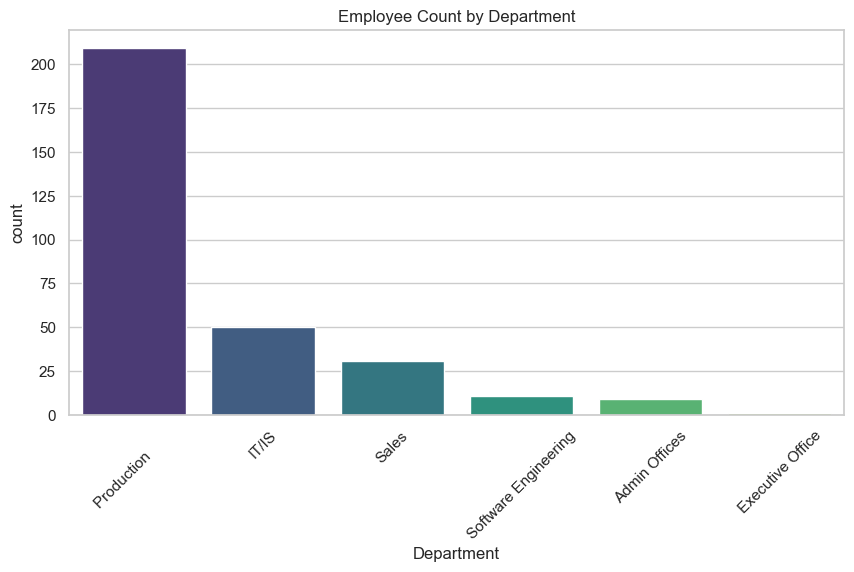

In [46]:
#Employee count by Department
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Department', order=df['Department'].value_counts().index, palette='viridis')
plt.title("Employee Count by Department")
plt.xticks(rotation=45)
plt.show()


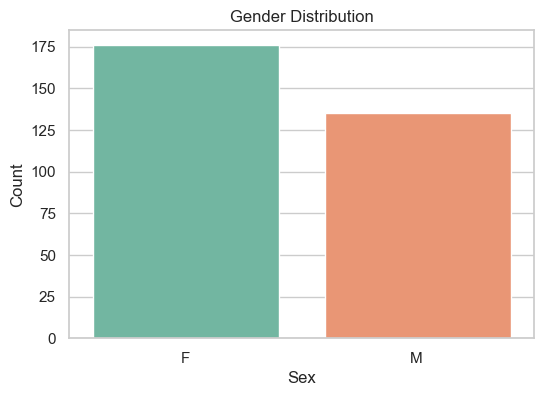

In [37]:
#Gender Distribution inside the company
gender_counts = df['Sex'].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=gender_counts.index, y=gender_counts.values, palette="Set2")
plt.title("Gender Distribution")
plt.ylabel("Count")
plt.show()


C:\Users\mkdaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


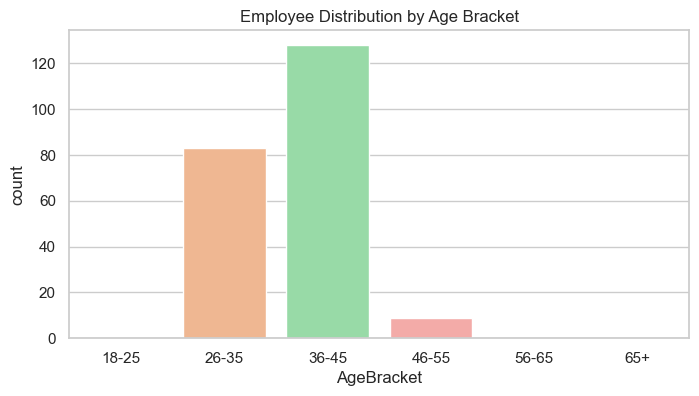

In [38]:
#Different Age Bracket of employees
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='AgeBracket', palette='pastel')
plt.title("Employee Distribution by Age Bracket")
plt.show()


C:\Users\mkdaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


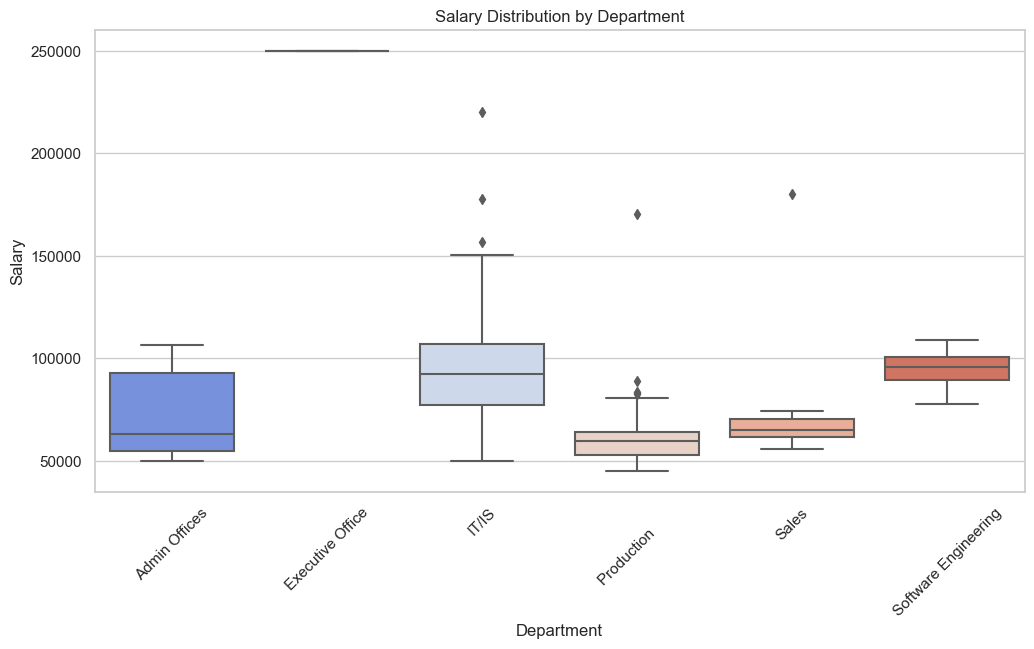

In [47]:
#Salary Distirbution by Department
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Department', y='Salary', palette='coolwarm')
plt.title("Salary Distribution by Department")
plt.xticks(rotation=45)
plt.show()


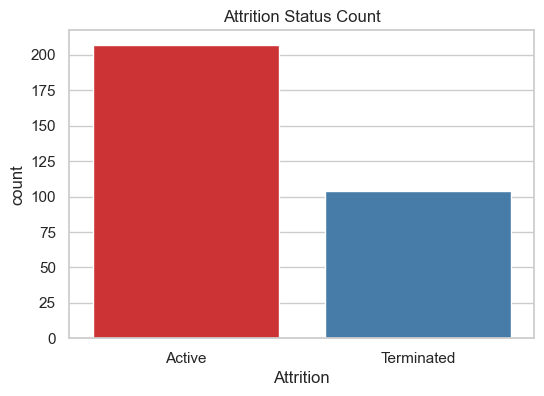

In [40]:
#Attrition Trend: Terminated vs Active
df['Attrition'] = df['DateofTermination'].notnull().map({True: 'Terminated', False: 'Active'})

plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Attrition', palette='Set1')
plt.title("Attrition Status Count")
plt.show()


C:\Users\mkdaf\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


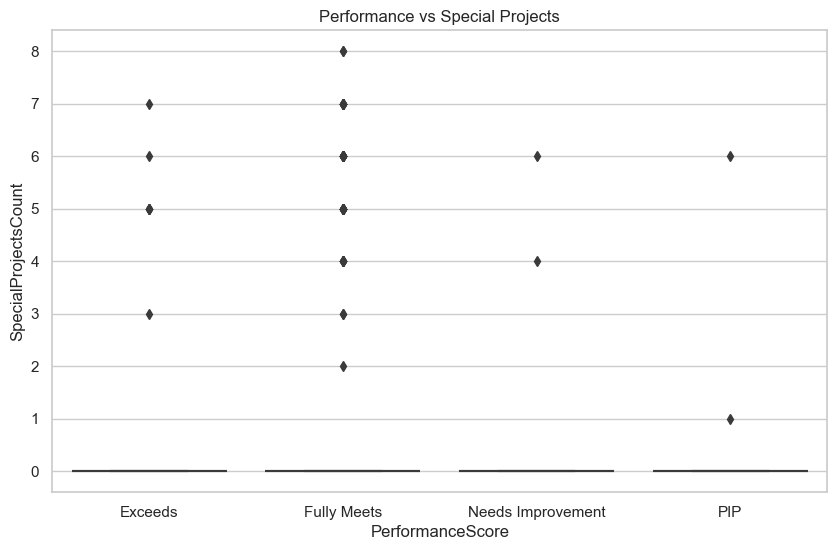

In [41]:
#Performance Score vs Special Projects
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='PerformanceScore', y='SpecialProjectsCount', palette='Blues')
plt.title("Performance vs Special Projects")
plt.show()


C:\Users\mkdaf\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


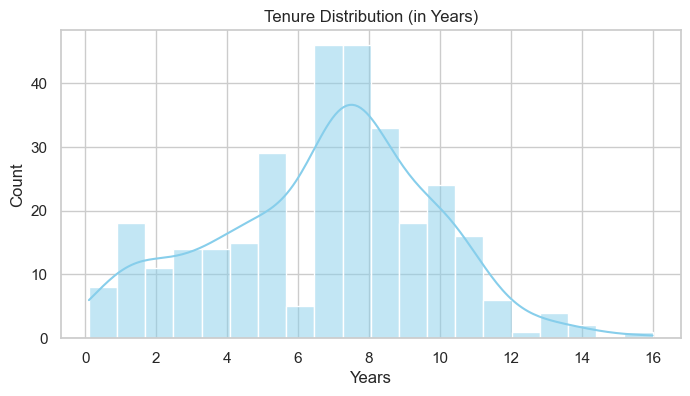

In [43]:
#Tenure Distribution
plt.figure(figsize=(8, 4))
sns.histplot(df['TenureYears'], bins=20, kde=True, color="skyblue")
plt.title("Tenure Distribution (in Years)")
plt.xlabel("Years")
plt.show()


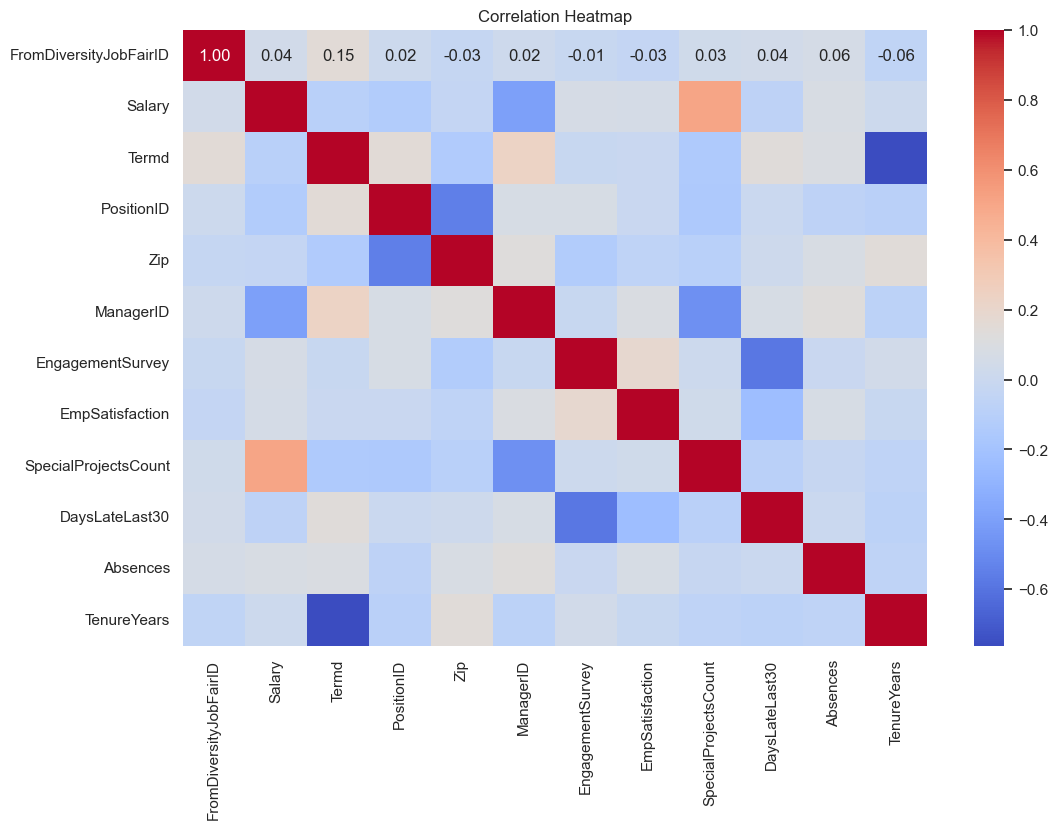

In [44]:
#Correlation Heatmap
plt.figure(figsize=(12, 8))
numerical_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()
